<a href="https://colab.research.google.com/github/sanjeevm4788/Online-Retail-Customer-Segmentation-/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

In [ ]:
dataset = pd.read_excel('Online Retail.xlsx')

In [ ]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
dataset.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
dataset.shape

(541909, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
dataset.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**The dataset has null values that needs to be handled**

In [ ]:
print('Duplicate entries: {}'.format(dataset.duplicated().sum()))
dataset=dataset.drop_duplicates()
dataset.shape

Duplicate entries: 5268


(536641, 8)

**The duplicate values are removed from the dataset**

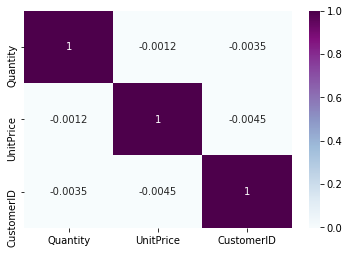

In [ ]:
sns.heatmap(dataset.corr(), cmap='BuPu', annot=True)

**There is not much correlation between the features**

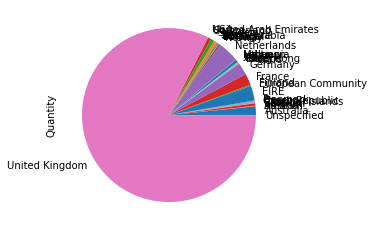

In [ ]:
dataset.groupby('Country').sum()['Quantity'].plot.pie()

**Most customers are from united kingdom**

In [ ]:
len(dataset["Country"].unique())

38

In [ ]:
dataset["Country"].value_counts()

United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [ ]:
len(dataset["CustomerID"].unique())

4373

In [ ]:
dataset["CustomerID"].value_counts()

17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
15657.0       1
18113.0       1
15668.0       1
13270.0       1
17752.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [ ]:
len(dataset["StockCode"].unique())

4070

In [ ]:
dataset["StockCode"].value_counts()

85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
90127A       1
35991        1
85036b       1
20871        1
84971l       1
Name: StockCode, Length: 4070, dtype: int64

In [ ]:
invoices = dataset["InvoiceNo"].str.contains('C', regex=True)
invoices.fillna(0, inplace=True)

In [ ]:
invoices = invoices.astype(int)
invoices.value_counts()

0    527390
1      9251
Name: InvoiceNo, dtype: int64

In [ ]:
dataset['OrderCancel'] = invoices

In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [ ]:
dataset["OrderCancel"].value_counts()

0    527390
1      9251
Name: OrderCancel, dtype: int64

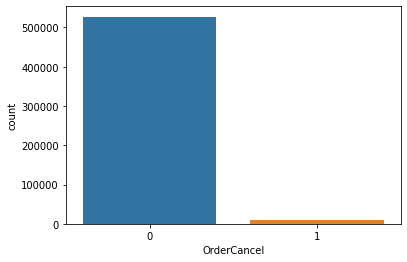

In [ ]:
sns.countplot(data=dataset, x='OrderCancel')

**There are less canceled orders**

In [ ]:
(dataset[dataset['OrderCancel']==1])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,1
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,1


In [ ]:
dataset = (dataset[dataset['OrderCancel']==0])

In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [ ]:
dataset.shape

(527390, 9)

In [ ]:
dataset[dataset['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,0
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,0
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,0
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,0
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,0
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,0


In [ ]:
dataset = dataset[dataset['Quantity']>0]

In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [ ]:
dataset.shape

(526054, 9)

In [ ]:
dataset = dataset[dataset['CustomerID'].notna()]

In [ ]:
dataset_uk = dataset[dataset.Country == 'United Kingdom'] 

In [ ]:
dataset_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349227 non-null  object        
 1   StockCode    349227 non-null  object        
 2   Description  349227 non-null  object        
 3   Quantity     349227 non-null  int64         
 4   InvoiceDate  349227 non-null  datetime64[ns]
 5   UnitPrice    349227 non-null  float64       
 6   CustomerID   349227 non-null  float64       
 7   Country      349227 non-null  object        
 8   OrderCancel  349227 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 26.6+ MB


In [ ]:
dataset_uk.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
OrderCancel    0
dtype: int64

In [ ]:
dataset_uk['Amount'] = dataset_uk['UnitPrice'] * dataset_uk['Quantity']

In [ ]:
dataset_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34


In [ ]:
from dateutil.relativedelta import relativedelta
all_dates = (pd.to_datetime(dataset_uk['InvoiceDate'])).apply(lambda x:x.date())
start_date = all_dates.max()-relativedelta(months=12,days=-1)
print('Start date: {}'.format(start_date))
print('End date: {}'.format(all_dates.max()))

Start date: 2010-12-10
End date: 2011-12-09


In [ ]:
dataset_rfm = dataset_uk[dataset_uk['InvoiceDate'] >= pd.to_datetime(start_date)]
dataset_rfm.reset_index(drop=True,inplace=True)
dataset_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,Amount
0,538172,21562,HAWAIIAN GRASS SKIRT,12,2010-12-10 09:33:00,1.25,15805.0,United Kingdom,0,15.0
1,538172,79321,CHILLI LIGHTS,8,2010-12-10 09:33:00,4.95,15805.0,United Kingdom,0,39.6
2,538172,22041,"RECORD FRAME 7"" SINGLE SIZE",12,2010-12-10 09:33:00,2.55,15805.0,United Kingdom,0,30.6
3,538172,84558A,3D DOG PICTURE PLAYING CARDS,12,2010-12-10 09:33:00,2.95,15805.0,United Kingdom,0,35.4
4,538172,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-10 09:33:00,0.55,15805.0,United Kingdom,0,13.2


In [ ]:
snapshot_date = max(dataset_rfm.InvoiceDate) + datetime.timedelta(days=1)
print('Snapshot date: {}'.format(snapshot_date.date()))

Snapshot date: 2011-12-10


In [ ]:
data = dataset_rfm.groupby(['CustomerID'],as_index=False).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,'InvoiceNo': 'count','Amount': 'sum'}).rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency','Amount': 'MonetaryValue'})

In [ ]:
data.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12747.0,2,96,3837.45
2,12748.0,1,4055,31081.74
3,12749.0,4,199,4090.88
4,12820.0,3,59,942.34


In [ ]:
data = data[['Recency','Frequency','MonetaryValue']]

In [ ]:
data.describe()

,Recency,Frequency,MonetaryValue
count,3855.000000,3855.000000,3855.000000
mean,87.428016,87.205966,1817.792603
std,93.428162,209.411865,7190.041841
min,1.000000,1.000000,0.000000
25%,17.000000,16.000000,291.680000
50%,50.000000,40.000000,638.060000
75%,134.000000,96.000000,1545.515000
max,365.000000,7491.000000,231822.690000


In [ ]:
data = data[data['MonetaryValue'] > 0]
data.reset_index(drop=True,inplace=True)

In [ ]:
data.describe()

,Recency,Frequency,MonetaryValue
count,3854.000000,3854.000000,3854.000000
mean,87.447068,87.228334,1818.264267
std,93.432795,209.434432,7190.915178
min,1.000000,1.000000,3.750000
25%,17.000000,16.250000,291.910000
50%,50.000000,40.000000,638.540000
75%,134.000000,96.000000,1545.567500
max,365.000000,7491.000000,231822.690000


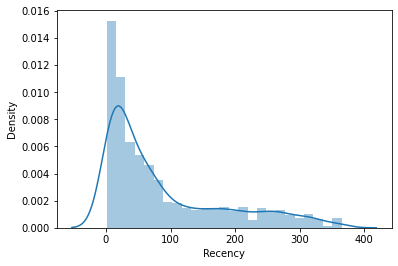

In [ ]:
sns.distplot(data['Recency'])

**Recency is postively skewed**

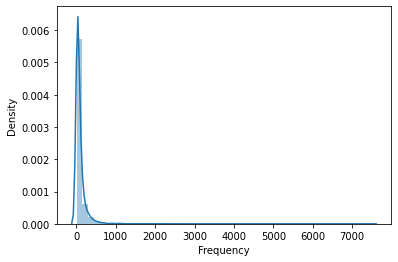

In [ ]:
sns.distplot(data['Frequency'])

**Frequency is postively skewed**

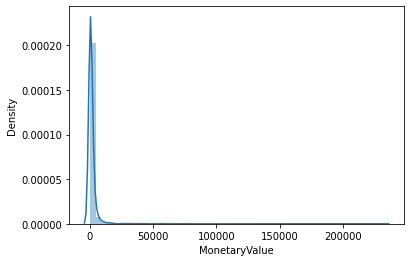

In [ ]:
sns.distplot(data['MonetaryValue'])

**MonetaryValue is postively skewed**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data_log = np.log(data)
scaler = StandardScaler()
scaler.fit_transform(data_log)
final_data = pd.DataFrame(data=data_log)

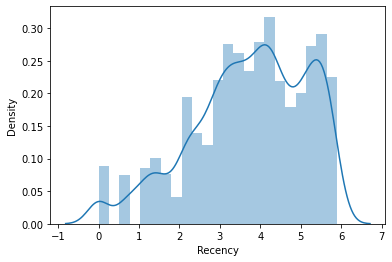

In [ ]:
sns.distplot(final_data['Recency'])

**skewness is removed**

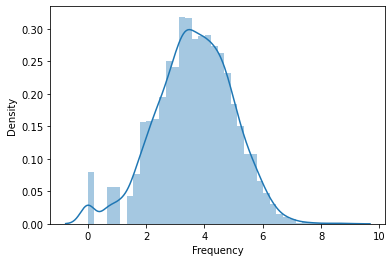

In [ ]:
sns.distplot(final_data['Frequency'])

**skewness is removed**

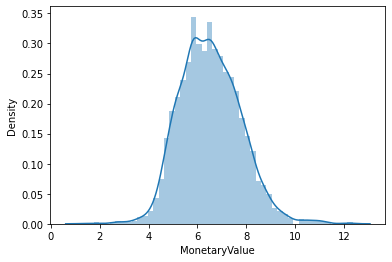

In [ ]:
sns.distplot(final_data['MonetaryValue'])

**skewness is removed**

In [ ]:
final_data.head()

,Recency,Frequency,MonetaryValue
0,5.786897,0.000000,11.253942
1,0.693147,4.564348,8.252563
2,0.000000,8.307706,10.344376
3,1.386294,5.293305,8.316515
4,1.098612,4.077537,6.848366


In [ ]:
from sklearn.cluster import KMeans

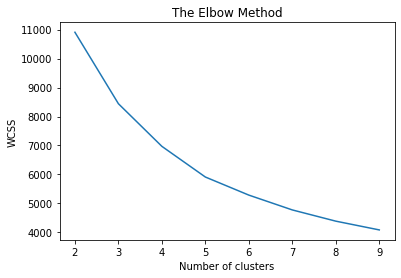

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(final_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**The elbow is in 3**

In [ ]:
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [ ]:
final_kmeans = KMeans(n_clusters=3, random_state=50)
final_kmeans.fit(final_data)
cluster_labels = final_kmeans.labels_
model = final_kmeans.predict(final_data)
print('k-means clustering, For cluster = 3 silhouette score is {}'.format(silhouette_score(final_data, model)))
print('k-means clustering, For cluster = 3 Davies_bouldin score is {}'.format(davies_bouldin_score(final_data, cluster_labels)))

k-means clustering, For cluster = 3 silhouette score is 0.30112703560069015
k-means clustering, For cluster = 3 Davies_bouldin score is 1.107966679922283


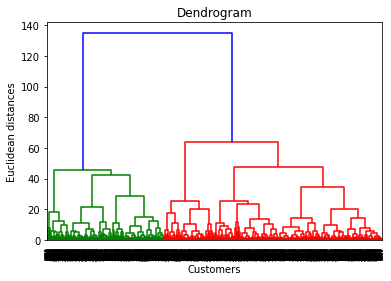

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(final_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

**The maximum split is in 2 but we take 3 to make much nicer segementation**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3)
model = hc.fit_predict(final_data)
hc_cluster_labels = hc.labels_
print('Hierarchical clustering, For cluster = 3 c score is {}'.format(silhouette_score(final_data, model)))
print('Hierarchical clustering, For cluster = 3 Davies_bouldin score is {}'.format(davies_bouldin_score(final_data, hc_cluster_labels)))

Hierarchical clustering, For cluster = 3 silhouette score is 0.27342306164434393
Hierarchical clustering, For cluster = 3 Davies_bouldin score is 1.1506183228222095


**CONCLUSION**

**1.As K-means has the high score , it can be as used for the segmentation.**

**2.The model can help to segment the customers on the basis on which their activities.**

**3.The model helps to segment customer as it helps to target them with their interests with similar customers.**


**SUMMARY**

**The project is based on online retail customers to make segmentation on customers. The dataset have many null values and have duplicate values, they were handled. The aim of the project is to segment the customers on their activity. The dataset have many features that cannot be fed directly after cleansing the dataset. The RFM segmentation is created for the dataset and RFM can be used to catch the required behavior of the customer. So only the required data are fed to the model (RFM). The data have skewness, so it is fed to log transformation and standard scalar to remove skewness. Two models are used, to select one with high performance. The two models that are used are K-means clustering and hierarchical clustering. Different types of models needs to be trained to find the one model with high accuracy. The scoring metric used for these models are silhouette score and davies_bouldin score. The elbow method foe k-means and dendogram for hierarchical were used to find the optimal clusters. So the models were with optimal clusters to get the most out of them.  The k-means have good silhouette score and davies_bouldin score when compared to hierarchical clustering. This k-means model can be used to segment the customers accordingly and can specify the interest with similar customer thus improving the sales.**